## Name- Urja Kumari


## Explanation:

* Data Analysis and Data Visualization is done on the dataset.

* Data Cleaning, i.e, missing values, transformation of the dataset, dealing with the issues of outliers and multicollinearity has been done. The cleaning process is described after each major step in the notebook.

* Since there is a supervised machine Learning algorithm so I have implemented models like Logistic Regression, Decision Tree, Random Forest, KNN, and Support Vector Machine(Implementing SVM was taking way too long because of the dataset being very large even after transformation). Deep Learning Model Like Artificial Neural Networks has also been implemented by making using of tensorflow with functional keras API.

* The dataset is highly imbalanced which made the task of prediction very difficult for linear model like Logistic Regression and hence Logistic Regression could not capture the patterns as well as compared to the other models. 

 

## Data PreProcessing:

* This is a large dataset consisting of 63,62,620 entries and there are 10 independent features and one dependent feature namely 'isFraud.

* There are no null values present along any of the features and hence does not need any preprocessing along that line.

* The feature 'step' just contains maps a unit of time in real world and thus is not indicative of any pattern in the data.

* Transform the Dataset: From the analysis we could observe that the dataset is highly imbalanced and hence needs to be preprocessed.

* The entry corresponds to be of fraudalent type only when the type is either CASH_OUT or TRANSFER, hence we transform the dataset such that it contains only those entries which have either of the two types mentioned.

* The new dataset consists of 27,70,409 entries and 9 independent features.

* There is almost equal number of Fraudulant cases in both the types: TRANSFER and CASH_OUT. However the total number of non fraudalent cases is much more in the CASH_OUT type transaction in comparison to the TRANSFER type.

* On exploring the feature 'nameOrig' which represents the name of the customer who started the transaction, it was realised that only in few cases the transaction was started by the same customer. Also I checked number of times the transaction was started more than once by the same customer in the case of fraudulant cases and realised that no two cases which were fraud were repeated by the same person. It therefore is not indicative of any pattern that could be helpful in prediction. The feature was therefore dropped.

* The feature 'isFlaggedFraud' consists of only 16 entries corresponding to category 1 and rest all are 0. On further analysis it is seen that all these 16 entries also correspond to the category 1 in the 'isFraud' feature. Hence we can deduce that if there is a 1 in the isFlaggedFraud category then it guarentees the case of Fraud (completely correlated) and hence can be useful while making predictions. So this column is not dropped and left as it is.

* On analysing the feature 'nameDest' which stores information regarding the customer who is the recipient of transaction, it was realised that there were around 5 lakhs unique recipient ids amongst a total of around 27.5 lakhs transactions. This implies that the recipient account is repeated in certain transactions. This can be important in deriving insights about the patterns since it is very likely for the scammers to repeat the process with different customers and hence the destination account could be same in many cases.

* It would therefor not be wise to drop this column altogether like we did for the 'nameOrig' feature. Hence to capture the information, a new column called count_dest has been created which stores the number of times a particular destination account has been encountered during different transactions. After creating this column, the original column 'nameDest' has been dropped.

* There are also cases where the destination account happens to be same in different transactions where some transactions have been classified into fraud and some into non-fraud. Hence 'count_dest' might not be the best to understandand and therefore it was dropped later.

* After analysing the feature 'newbalanceOrig', we can see that in most of the fraudulant cases the new balance of the customer is 0 as is expected.

* However there are instance where the amount left in the customer's account lies far away from 3 standard deviations (outliers), but since the dataset is highly imbalanced so dropping these outliers could significantly impact the model's prediction abilities and accuracy. Therefore it would be wise to not make changes or drop rows for now.

* There are entries where the original balance is 0 but there is some amount transaction that is shown along the 'amount' column which does not seem right to me. So I have removed such rows from the dataset as it could create some discrepancy.

* Since a lot of fraud category data points lies as outliers for the feature 'oldbalanceOrg' so it would be difficult to remove the outliers as it could impact the accuracy.

* Another insight is that the transactions done through the 'TRANSFER' method are on accounts with high old balance amount while the CASH_OUT type transaction is done on accounts with lower original balance.

* There are majorly two kinds of cases, one where the final balance in the destination account is 0 and one where it is not 0.

* The case where the destination account has 0 amount are mostly where the transactions are done through the 'TRANSFER' method and the situation where is some amount in the destination account, the transactions have been done through the 'CASH_OUT' method.

* Most of the outliers pertaining to the feature 'newbalanceDest' are associated to non fraudulant case which shows that in most of the fraudulant casesthe new balance of the destination account is kept low.

* Through the correlation heatmap we could see that the two features, namely 'oldbalanceDest' and 'newbalanceDest' are highly correlated so it can be a good idea to drop one of the two features, since it can lead to the problem of multicollinearity and create biasness in prediction.

* On analysing the feature 'amount' we understood that most of the outliers belonged to the non- fraudulant category .Further analysis showed that those outliers lies many standard deviations away . So I decided to remove the outlier which were further than the maximum amount value categorised as the fraudulant class (2443 rows) since it can still keep intact the information necessary for prediction.

### Metric For Evaluating the Performance:

* Since its a classification problem so various metrics like accuracy score, recall score, precision score, f1 score, classification report, and confusion matrix was determined to evaluate the performance of different models. However this is a case where the dataset is highly imbalanced hence metrics like accuracy score and precision score could not give a good idea about how well the model is performing. Recall score gives a better idea regarding the model's performance. 

* All the models gave good accuracy and precision score but only decision tree could give a decent recall score (indicative that other models were not able to classify the fraudulant class properly).

## Best Performing Model:

* Artificial Neural Network gave good result on both the training and test datasets. This might be because neural networks especially deep neural networks are highly capable of capturing complex patterns in the data since they can automatically learn hierarchal representation of features which can be important when dealing with non linear relationships in the data.

* It gave a high recall score(0.997) along with the other metrics which shows that it could correctly identify most of the Fraud cases.

* The model is implemented by making use of the tensorflow keras API.

* There are three hidden layers that have been considered with 32, 64, and 128 neurons in the three subsequent layers.

### Performance of Machine Learning Algorithms:

* Decision Tree performed the best among other supervised machine learning algorithms in terms of getting a good 'recall_score'. When the dataset is highly imbalanced the decision tree might capture the minority class better leading to higher recall. Decision trees are also prone to overfitting so this is also one of the possibilities.

* Other Supervised Machine learning algorithms like Random forest, KNN, and Support Vector Machine require careful hyperparameter tuning for them to deliver an optimal result. Hyperparameter tuning was attempted using 'GridSearchCV' method however the process was taking way too long on my system.

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy

### Load Dataset

In [6]:
df = pd.read_csv('fraud.csv')

### Understand the Dataset

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Insights from the Dataset

* This is a large dataset consisting of 63,62,620 entries and there are 10 independent features and one dependent feature namely 'isFraud.

* There are no null values present along any of the features and hence does not need any preprocessing along that line. 

* The feature 'step' just contains maps a unit of time in real world and thus is not indicative of any pattern in the data.

### Check if the Dataset is Balanced or not

<Axes: xlabel='isFraud', ylabel='count'>

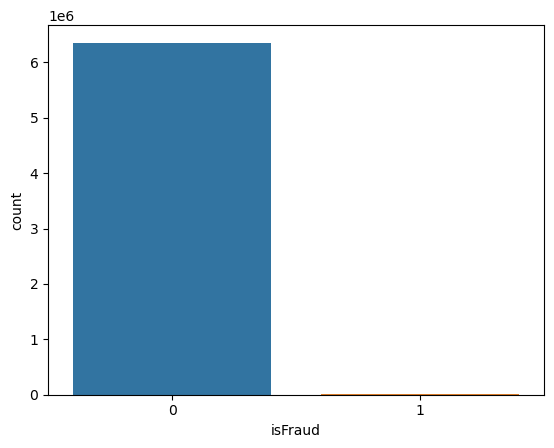

In [12]:
sns.countplot(x='isFraud', data=df)

In [13]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

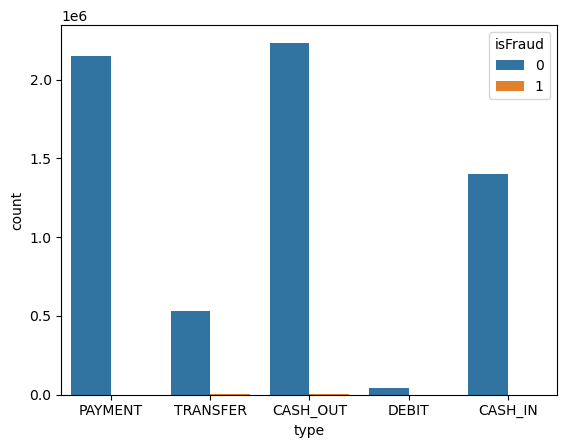

In [15]:
sns.countplot(x='type',data=df,hue='isFraud')

In [16]:
df[df['isFraud']==1]['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

### Transform the Dataset:

* From the above analysis we can observe that the dataset is highly imbalanced and hence needs to be preprocessed.

* The entry corresponds to be of fraudalent type only when the type is either CASH_OUT or TRANSFER, hence we transform the dataset such that it contains only those entries which have either of the two types mentioned.

In [17]:
df_new = df[(df['type']=='CASH_OUT') | (df['type']=='TRANSFER')]

In [18]:
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


In [20]:
df_new.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,5.775321e-06
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,2.403183e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
df_new = df_new.drop(['step'], axis=1)

In [22]:
df_new['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [23]:
df_new[df_new['type']=='TRANSFER']['isFraud'].value_counts()

0    528812
1      4097
Name: isFraud, dtype: int64

In [24]:
df_new[df_new['type']=='CASH_OUT']['isFraud'].value_counts()

0    2233384
1       4116
Name: isFraud, dtype: int64

### About the Newly Formed Dataset:

* The new dataset consists of 27,70,409 entries and 9 independent features.

* There is almost equal number of Fraudulant cases in both the types: TRANSFER and CASH_OUT. However the total number of non fraudalent cases is much more in the CASH_OUT type transaction in comparison to the TRANSFER type.

## Explore Different Features

### nameOrig 

In [25]:
df_new['nameOrig'].nunique()   #seems to be not so repeating 

2768630

In [26]:
df_new[df_new['isFraud']==1]['nameOrig'].nunique()  # the frauds have not done the transfer or cash out using the same name and 
                                          # hence 'nameOrig' does not seem to have any correlation with the 'Fraud' category. 

8213

In [27]:
df_new= df_new.drop(['nameOrig'], axis=1)

In [28]:
df_new.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.0,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,181.0,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


On exploring the feature 'nameOrig' which represents the name of the customer who started the transaction, it was realised that only in few cases the transaction was started by the same customer. Also I checked number of times the transaction was started more than once by the same customer in the case of fraudulant cases and realised that no two cases which were fraud were repeated by the same person. It therefore is not indicative of any pattern that could be helpful in prediction. The feature was therefore dropped.

### Feature 'isFlaggedFraud'

In [29]:
df_new['isFlaggedFraud'].value_counts()

0    2770393
1         16
Name: isFlaggedFraud, dtype: int64

In [30]:
df_new[df_new['isFraud']==1]['isFlaggedFraud'].value_counts()

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

The feature 'isFlaggedFraud' consists of only 16 entries corresponding to category 1 and rest all are 0. On further analysis it is seen that all these 16 entries also correspond to the category 1 in the 'isFraud' feature. Hence we can deduce that if there is a 1 in the isFlaggedFraud category then it guarentees the case of Fraud (completely correlated) and hence can be useful while making predictions. So this column is not dropped and left as it is.

### Feature 'nameDest'

In [31]:
df_new['nameDest'].nunique()    

509565

In [32]:
df_new[df_new['isFraud']==1]['nameDest'].nunique()

8169

In [33]:
#df_new['count'] = df_new['nameDest'].apply(lambda str: (df_new['nameDest']==str).sum()) 

df_new['count_dest'] = df_new.groupby('nameDest')['nameDest'].transform('count')

In [34]:
df_new[(df_new['isFraud']==1) & (df_new['count_dest'] >1)]

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,count_dest
2,TRANSFER,181.00,181.00,0.0,C553264065,0.00,0.00,1,0,27
3,CASH_OUT,181.00,181.00,0.0,C38997010,21182.00,0.00,1,0,31
251,TRANSFER,2806.00,2806.00,0.0,C972765878,0.00,0.00,1,0,20
252,CASH_OUT,2806.00,2806.00,0.0,C1007251739,26202.00,0.00,1,0,24
680,TRANSFER,20128.00,20128.00,0.0,C1848415041,0.00,0.00,1,0,22
...,...,...,...,...,...,...,...,...,...,...
6362607,CASH_OUT,303846.74,303846.74,0.0,C846260566,343660.89,647507.63,1,0,2
6362611,CASH_OUT,63416.99,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,3
6362613,CASH_OUT,1258818.82,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,3
6362617,CASH_OUT,6311409.28,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,3


In [35]:
df_new[df_new['nameDest']=='C553264065']

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,count_dest
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,27
6167,TRANSFER,109985.65,41851.00,0.00,C553264065,0.00,109985.65,0,0,27
16381,CASH_OUT,111622.39,2347.00,0.00,C553264065,99729.44,5254.44,0,0,27
62736,TRANSFER,1447322.21,65634.00,0.00,C553264065,5254.44,1317666.01,0,0,27
227904,CASH_OUT,340825.56,0.00,0.00,C553264065,1303946.65,1384840.44,0,0,27
292508,CASH_OUT,128766.03,0.00,0.00,C553264065,1256074.41,1384840.44,0,0,27
425019,TRANSFER,1491.48,0.00,0.00,C553264065,1384840.44,1439708.33,0,0,27
436299,CASH_OUT,53376.40,0.00,0.00,C553264065,1386331.92,1439708.33,0,0,27
492328,CASH_OUT,510506.07,0.00,0.00,C553264065,1439708.33,2112180.23,0,0,27
531255,CASH_OUT,161965.84,10206.00,0.00,C553264065,1950214.39,2112180.23,0,0,27


In [36]:
df_new = df_new.drop(['count_dest'], axis=1)

* On analysing the feature 'nameDest' which stores information regarding the customer who is the recipient of transaction, it was realised that there were around 5 lakhs unique recipient ids amongst a total of around 27.5 lakhs transactions. This implies that the recipient account is repeated in certain transactions. This can be important in deriving insights about the patterns since it is very likely for the scammers to repeat the process with different customers and hence the destination account could be same in many cases. 

* It would therefor not be wise to drop this column altogether like we did for the 'nameOrig' feature. Hence to capture the information, a new column called count_dest has been created which stores the number of times a particular destination account has been encountered during different transactions. After creating this column, the original column 'nameDest' has been dropped.

* There are also cases where the destination account happens to be same in different transactions where some transactions have been classified into fraud and some into non-fraud. Hence 'count_dest' might not be the best to understandand and therefore it was dropped later.

In [37]:
df_new = df_new.drop(['nameDest'], axis=1)

In [38]:
df_new

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,0
19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0
24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


### newbalanceOrig

In [39]:
df_new[df_new['newbalanceOrig']==0.0]['isFraud'].value_counts()

0    2488603
1       8053
Name: isFraud, dtype: int64

In [40]:
newbalanceOrig_std = df_new['newbalanceOrig'].std()
newbalanceOrig_mean = df_new['newbalanceOrig'].mean()
newbalanceOrig_min = df_new['newbalanceOrig'].min()
newbalanceOrig_max=df_new['newbalanceOrig'].max()

print("Min: ",newbalanceOrig_min)
print("Max: ",newbalanceOrig_max)
print("Mean: ",newbalanceOrig_mean)
print("Std: ",newbalanceOrig_std )

Min:  0.0
Max:  49585040.37
Mean:  16091.90467901671
Std:  151255.8247610912


In [41]:
df_new[df_new['newbalanceOrig'] > (3 *newbalanceOrig_std + newbalanceOrig_mean)]['isFraud'].value_counts()

0    19359
1      153
Name: isFraud, dtype: int64

In [42]:
df_new[(df_new['newbalanceOrig'] > (3 *newbalanceOrig_std + newbalanceOrig_mean)) & (df['isFraud']==1)]

C:\Users\ishid\AppData\Local\Temp\ipykernel_15440\3372371745.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[(df_new['newbalanceOrig'] > (3 *newbalanceOrig_std + newbalanceOrig_mean)) & (df['isFraud']==1)]


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,TRANSFER,10000000.00,12930418.44,2930418.44,0.0,0.0,1,0
481250,TRANSFER,10000000.00,11861008.32,1861008.32,0.0,0.0,1,0
586311,TRANSFER,10000000.00,19887819.06,9887819.06,0.0,0.0,1,0
1030559,TRANSFER,10000000.00,18594065.09,8594065.09,0.0,0.0,1,0
1030661,TRANSFER,10000000.00,10987591.59,987591.59,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...
6362576,TRANSFER,10000000.00,45674547.89,35674547.89,0.0,0.0,1,0
6362578,TRANSFER,10000000.00,35674547.89,25674547.89,0.0,0.0,1,0
6362580,TRANSFER,10000000.00,25674547.89,15674547.89,0.0,0.0,1,0
6362582,TRANSFER,10000000.00,15674547.89,5674547.89,0.0,0.0,1,0


* After analysing the feature 'newbalanceOrig', we can see that in most of the fraudulant cases the new balance of the customer is 0 as is expected. 

* However there are instance where the amount left in the customer's account lies far away from 3 standard deviations (outliers), but since the dataset is highly imbalanced so dropping these outliers could significantly impact the model's prediction abilities and accuracy. Therefore it would be wise to not make changes or drop rows for now.

### oldbalanceOrg

In [43]:
df_new[(df_new['oldbalanceOrg']==0.0) & (df_new['isFraud']==1)]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,CASH_OUT,416001.33,0.0,0.0,102.00,9291619.62,1,0
14861,CASH_OUT,181728.11,0.0,0.0,11397.00,184477.77,1,0
25875,TRANSFER,1078013.76,0.0,0.0,0.00,970749.68,1,0
77745,CASH_OUT,277970.88,0.0,0.0,0.00,277970.88,1,0
138559,TRANSFER,1933920.80,0.0,0.0,1283762.85,3217683.65,1,0
169998,CASH_OUT,149668.66,0.0,0.0,44170.11,193838.76,1,0
178668,CASH_OUT,222048.71,0.0,0.0,2979.00,225027.71,1,0
200845,CASH_OUT,454859.39,0.0,0.0,0.00,454859.39,1,0
291459,CASH_OUT,95428.32,0.0,0.0,0.00,95428.32,1,0
296686,CASH_OUT,39713.28,0.0,0.0,1274866.51,1314579.79,1,0


From above we can see that there are entries where the original balance is 0 but there is some amount transaction that is shown along the 'amount' column which does not seem right to me. So I have removed such rows from the dataset as it could create some discrepancy.

In [44]:
mask = (df_new['oldbalanceOrg']==0.0) & (df_new['isFraud']==1)
df_new= df_new.drop(df_new[mask].index, axis=0)      

In [45]:
temp = df_new['isFraud'] == 1
filtered_indices = df_new[temp]['oldbalanceOrg'] > (3* df_new['oldbalanceOrg'].std() +df_new['oldbalanceOrg'].mean())

result_df = df_new.loc[df_new[temp][filtered_indices].index]

In [46]:
result_df['isFraud'].value_counts()

1    3097
Name: isFraud, dtype: int64

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

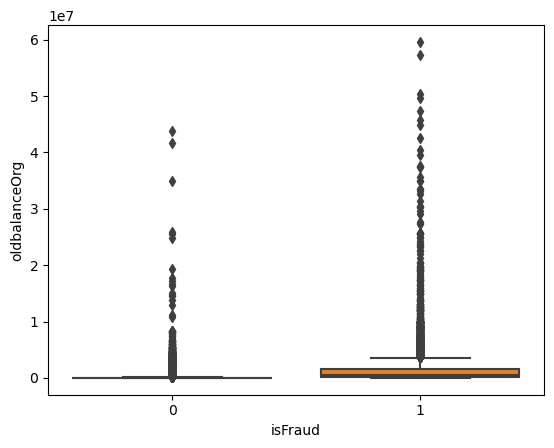

In [47]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df_new)

In [48]:
df_new[df_new['isFraud']==0]['oldbalanceOrg'].max()

43818855.3

In [49]:
df_new[df_new['isFraud']==1]['oldbalanceOrg'].max()

59585040.37

In [50]:
temp= df_new['isFraud']==1
filtered_indices = df_new[temp]['oldbalanceOrg'] > (df_new[df_new['isFraud']==0]['oldbalanceOrg'].max())
m =df_new.loc[df_new[temp][filtered_indices].index]

In [51]:
m

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5563705,TRANSFER,10000000.0,44892193.09,34892193.09,0.0,0.0,1,0
5996399,TRANSFER,10000000.0,59585040.37,49585040.37,0.0,0.0,1,0
5996401,TRANSFER,10000000.0,49585040.37,39585040.37,0.0,0.0,1,0
6281474,TRANSFER,10000000.0,50399045.08,40399045.08,0.0,0.0,1,0
6362452,TRANSFER,10000000.0,57316255.05,47316255.05,0.0,0.0,1,0
6362454,TRANSFER,10000000.0,47316255.05,37316255.05,0.0,0.0,1,0
6362576,TRANSFER,10000000.0,45674547.89,35674547.89,0.0,0.0,1,0


<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

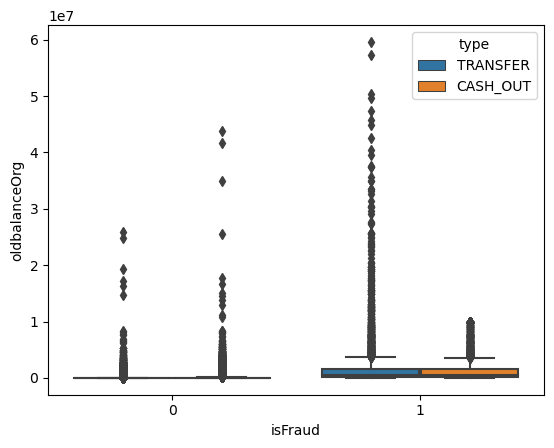

In [52]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df_new, hue='type')

* Since a lot of fraud category data points lies as outliers for the feature 'oldbalanceOrg' so it would be difficult to remove the outliers as it could impact the accuracy.

* Another insight is that the transactions done through the 'TRANSFER' method are on accounts with high old balance amount while the CASH_OUT type transaction is done on accounts with lower original balance.

In [53]:
df_new[df_new['newbalanceDest']==0.0]['isFraud'].value_counts()

0    12508
1     4085
Name: isFraud, dtype: int64

In [54]:
df_new[(df_new['newbalanceDest']==0.0) & (df_new['isFraud']==1)]['type'].value_counts()

TRANSFER    4068
CASH_OUT      17
Name: type, dtype: int64

In [55]:
df_new[(df_new['newbalanceDest']!=0.0) & (df_new['isFraud']==1)]['type'].value_counts()

CASH_OUT    4062
TRANSFER      25
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

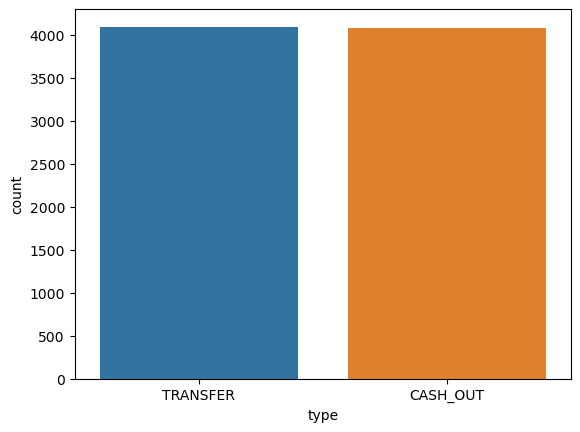

In [56]:
df_plot= df_new[df_new['isFraud']==1]
sns.countplot(x='type', data=df_plot)

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

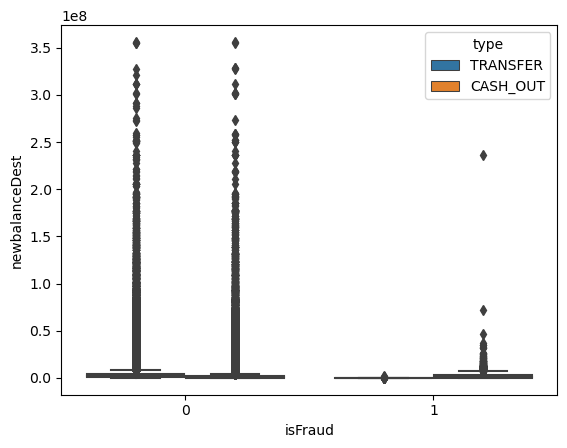

In [57]:
sns.boxplot(x='isFraud', y='newbalanceDest', data=df_new,hue='type')

* There are majorly two kinds of cases, one where the final balance in the destination account is 0 and one where it is not 0.

* The case where the destination account has 0 amount are mostly where the transactions are done through the 'TRANSFER' method and the situation where is some amount in the destination account, the transactions have been done through the 'CASH_OUT' method.

* Most of the outliers pertaining to the feature 'newbalanceDest' are associated to non fraudulant case which shows that in most of the fraudulant casesthe new balance of the destination account is kept low.

## Check how correlated the features are:

C:\Users\ishid\AppData\Local\Temp\ipykernel_15440\1695001384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= df_new.corr()


<Axes: >

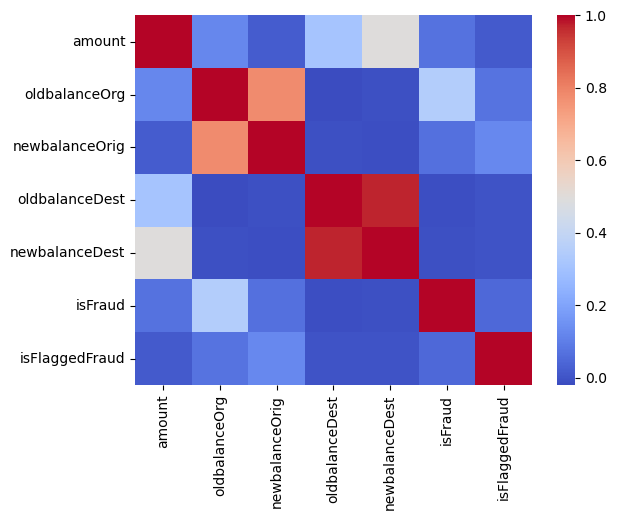

In [58]:
correlation_matrix= df_new.corr()
sns.heatmap(data= correlation_matrix, cmap='coolwarm')

* Through the correlation heatmap we can see that the tewo features, namely 'oldbalanceDest' and 'newbalanceDest' are highly correlated so it can be a good idea to drop one of the two features, since it can lead to the problem of multicollinearity and create biasness in prediction. 

In [59]:
df_new= df_new.drop(['newbalanceDest'], axis=1)

In [60]:
df_new.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.0,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.0,21182.0,1,0
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,0,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,0,0


### Lets explore the feature 'amount'

<Axes: xlabel='type', ylabel='amount'>

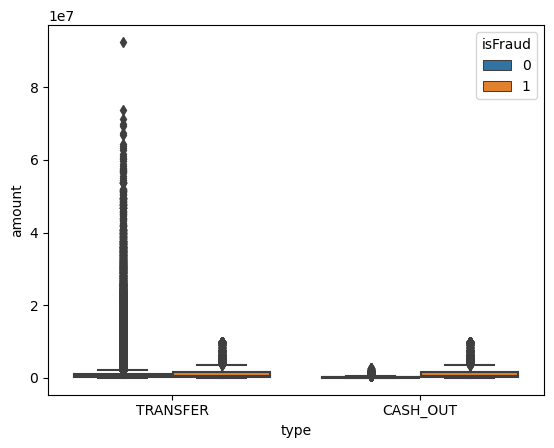

In [61]:
sns.boxplot(x='type', y='amount', data=df_new, hue='isFraud')

In [62]:
df_new[(df_new['isFraud']==0) & (df_new['type']=='TRANSFER')].count()

type              528812
amount            528812
oldbalanceOrg     528812
newbalanceOrig    528812
oldbalanceDest    528812
isFraud           528812
isFlaggedFraud    528812
dtype: int64

In [63]:
df_new[(df_new['isFraud']==0) & (df_new['type']=='TRANSFER')]['amount'].describe()

count    5.288120e+05
mean     9.062290e+05
std      1.874155e+06
min      2.600000e+00
25%      2.165708e+05
50%      4.865219e+05
75%      9.727336e+05
max      9.244552e+07
Name: amount, dtype: float64

In [64]:
df_new[(df_new['isFraud']==1) & (df_new['type']=='TRANSFER')]['amount'].max()

10000000.0

In [65]:
df_new[(df_new['isFraud']==1) & (df_new['type']=='CASH_OUT')]['amount'].max()

10000000.0

In [66]:
amount_notFraud_std = df_new[(df_new['isFraud']==0) & (df_new['type']=='TRANSFER')]['amount'].std()
amount_notFraud_mean = df_new[(df_new['isFraud']==0) & (df_new['type']=='TRANSFER')]['amount'].mean()

In [67]:
values_remove=3* amount_notFraud_std + amount_notFraud_mean
values_remove

6528694.7841126025

In [68]:
temp_check = df_new['amount'] > values_remove
df_new[temp_check].count()

type              8708
amount            8708
oldbalanceOrg     8708
newbalanceOrig    8708
oldbalanceDest    8708
isFraud           8708
isFlaggedFraud    8708
dtype: int64

In [69]:
temp_check = df_new['amount'] > 10000000
df_new[temp_check].count()

type              2443
amount            2443
oldbalanceOrg     2443
newbalanceOrig    2443
oldbalanceDest    2443
isFraud           2443
isFlaggedFraud    2443
dtype: int64

In [70]:
temp= df_new['isFraud']==0
filtered =(df_new['isFraud']==0) & (df_new['type']=='TRANSFER') & (df_new['amount']>10000000)
df_new = df_new.drop(df_new[filtered].index)

<Axes: xlabel='type', ylabel='amount'>

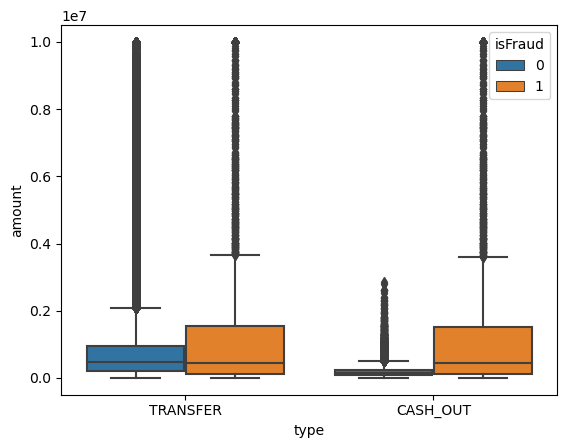

In [71]:
sns.boxplot(x='type', y='amount', data=df_new, hue='isFraud')

* On analysing the feature 'amount' we understood that most of the outliers belonged to the non- fraudulant category .Further analysis showed that those outliers lies many standard deviations away . So I decided to remove the outlier which were further than the maximum amount value categorised as the fraudulant class (2443 rows) since it can still keep intact the information necessary for prediction. 

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

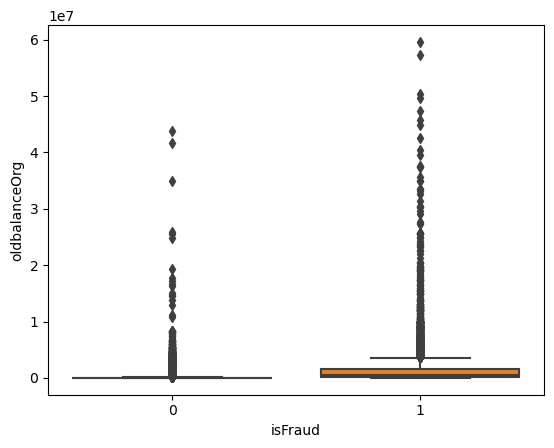

In [72]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df_new)

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

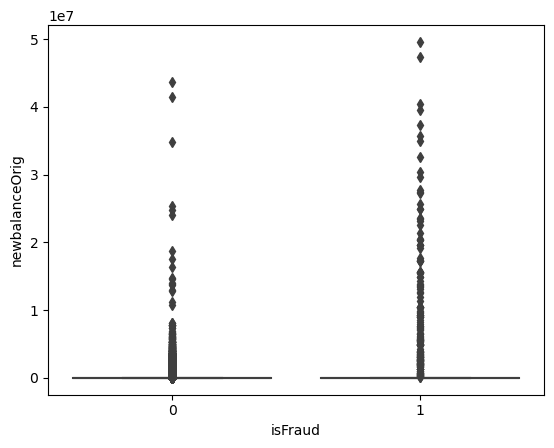

In [73]:
sns.boxplot(x='isFraud', y='newbalanceOrig', data=df_new)

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

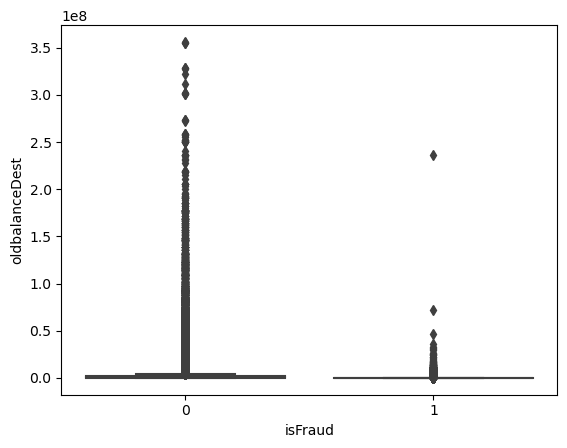

In [74]:
sns.boxplot(x='isFraud', y='oldbalanceDest', data=df_new)

In [75]:
max_old_dest_fraud= df_new[df_new['isFraud']==1]['oldbalanceDest'].max()

In [76]:
filtered =(df_new['isFraud']==0)  & (df_new['oldbalanceDest']> max_old_dest_fraud)
df_new = df_new.drop(df_new[filtered].index)

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

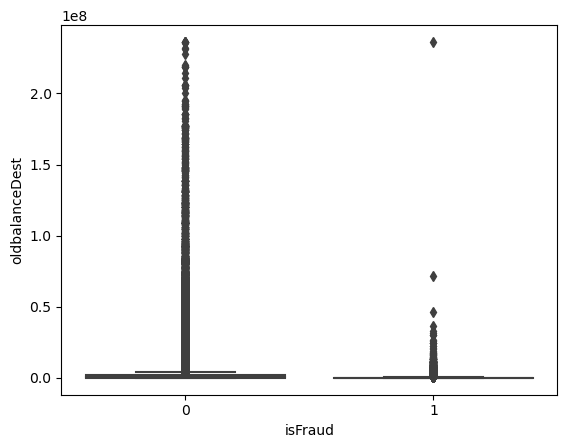

In [77]:
sns.boxplot(x='isFraud', y='oldbalanceDest', data=df_new)

In [78]:
k_mean = df_new[df_new['isFraud']==1]['oldbalanceDest'].mean()
k_std = df_new[df_new['isFraud']==1]['oldbalanceDest'].std()
k_max = df_new[df_new['isFraud']==1]['oldbalanceDest'].max()
indices = (df_new['isFraud']==1) & (df_new['oldbalanceDest'] > (8*k_std+k_mean))
df_new[indices].count()

type              8
amount            8
oldbalanceOrg     8
newbalanceOrig    8
oldbalanceDest    8
isFraud           8
isFlaggedFraud    8
dtype: int64

In [79]:
df_new.count()

type              2767896
amount            2767896
oldbalanceOrg     2767896
newbalanceOrig    2767896
oldbalanceDest    2767896
isFraud           2767896
isFlaggedFraud    2767896
dtype: int64

In [80]:
df_new.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.0,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.0,21182.0,1,0
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,0,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,0,0


### One Hot Encode 'type' column

In [81]:
df_new = pd.get_dummies(data=df_new, columns=['type'], drop_first=True)

In [82]:
df_new.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
2,181.00,181.0,0.0,0.0,1,0,1
3,181.00,181.0,0.0,21182.0,1,0,0
15,229133.94,15325.0,0.0,5083.0,0,0,0
19,215310.30,705.0,0.0,22425.0,0,0,1
24,311685.89,10835.0,0.0,6267.0,0,0,1


### Split the Dataset:

In [83]:
x= df_new.drop(['isFraud'], axis=1)
y= df_new['isFraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [84]:
x_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_TRANSFER
1939545,10220.64,0.00,0.0,4937401.68,0,0
6224886,124732.91,123783.00,0.0,0.00,0,0
5772862,291258.40,0.00,0.0,1575008.43,0,0
643073,357156.63,16175.00,0.0,6475493.88,0,0
5491143,187017.52,8036.00,0.0,270941.65,0,0
...,...,...,...,...,...,...
257922,196867.17,20140.00,0.0,1260818.54,0,0
3865239,82325.31,69725.00,0.0,596497.48,0,0
5399156,369912.14,25405.47,0.0,1948345.43,0,0
5098229,331040.55,0.00,0.0,478305.15,0,0


In [85]:
x_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_TRANSFER
2525429,64607.10,5262.0,0.0,0.00,0,0
3191229,183609.27,0.0,0.0,219710.10,0,0
783133,16814.99,0.0,0.0,1896271.25,0,0
1945937,292385.87,0.0,0.0,3043572.71,0,0
5521643,266734.88,0.0,0.0,1439031.48,0,0
...,...,...,...,...,...,...
820626,652547.01,0.0,0.0,2577562.94,0,1
2696604,439598.68,0.0,0.0,2072823.75,0,1
4176422,10000000.00,10431.0,0.0,0.00,0,1
115116,64603.79,21140.0,0.0,1530409.48,0,0


### Normalisation

* The four features, namely amount, oldbalanceOrg, newbalanceOrig, and oldbalanceDest are normalised to bring the values stored in these columns into a range of 0 and 1.

In [86]:
x_train_pre = x_train[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest']]
x_trainleft_pre = x_train[['isFlaggedFraud','type_TRANSFER']].values
x_test_pre = x_test[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest']]
x_testleft_pre = x_test[['isFlaggedFraud','type_TRANSFER']].values

In [87]:
x_train_pre

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest
1939545,10220.64,0.00,0.0,4937401.68
6224886,124732.91,123783.00,0.0,0.00
5772862,291258.40,0.00,0.0,1575008.43
643073,357156.63,16175.00,0.0,6475493.88
5491143,187017.52,8036.00,0.0,270941.65
...,...,...,...,...
257922,196867.17,20140.00,0.0,1260818.54
3865239,82325.31,69725.00,0.0,596497.48
5399156,369912.14,25405.47,0.0,1948345.43
5098229,331040.55,0.00,0.0,478305.15


In [88]:
x_trainleft_pre

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 1]], dtype=int64)

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_pre)

MinMaxScaler()

In [90]:
x_train_scaled = scaler.transform(x_train_pre)
x_test_scaled = scaler.transform(x_test_pre)

In [91]:
x_train_scaled

array([[0.00102206, 0.        , 0.        , 0.02092212],
       [0.01247329, 0.00207742, 0.        , 0.        ],
       [0.02912584, 0.        , 0.        , 0.00667406],
       ...,
       [0.03699121, 0.00042637, 0.        , 0.00825607],
       [0.03310405, 0.        , 0.        , 0.00202681],
       [0.00405525, 0.00037956, 0.        , 0.00031584]])

In [92]:
x_test_scaled = pd.DataFrame(data= x_test_scaled)

In [93]:
x_testleft_pre = pd.DataFrame(data= x_testleft_pre)

In [94]:
x_train_scaled = pd.DataFrame(data= x_train_scaled)


In [95]:
x_trainleft_pre = pd.DataFrame(data= x_trainleft_pre)

In [98]:
x_train_final = pd.concat([x_train_scaled,x_trainleft_pre], axis=1)
x_test_final = pd.concat([x_test_scaled,x_testleft_pre], axis=1)

In [99]:
x_test_final

,0,1,2,3,0,1
0,0.006461,0.000088,0.0,0.000000,0,0
1,0.018361,0.000000,0.0,0.000931,0,0
2,0.001681,0.000000,0.0,0.008035,0,0
3,0.029239,0.000000,0.0,0.012897,0,0
4,0.026673,0.000000,0.0,0.006098,0,0
...,...,...,...,...,...,...
913401,0.065255,0.000000,0.0,0.010922,0,1
913402,0.043960,0.000000,0.0,0.008784,0,1
913403,1.000000,0.000175,0.0,0.000000,0,1
913404,0.006460,0.000355,0.0,0.006485,0,0


In [100]:
x_train_final = x_train_final.values
x_test_final = x_test_final.values

In [101]:
x_train_final

array([[1.02206300e-03, 0.00000000e+00, 0.00000000e+00, 2.09221222e-02,
        0.00000000e+00, 0.00000000e+00],
       [1.24732900e-02, 2.07741741e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.91258390e-02, 0.00000000e+00, 0.00000000e+00, 6.67406078e-03,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [3.69912130e-02, 4.26373295e-04, 0.00000000e+00, 8.25606744e-03,
        0.00000000e+00, 0.00000000e+00],
       [3.31040540e-02, 0.00000000e+00, 0.00000000e+00, 2.02680670e-03,
        0.00000000e+00, 0.00000000e+00],
       [4.05524800e-03, 3.79558357e-04, 0.00000000e+00, 3.15839570e-04,
        0.00000000e+00, 1.00000000e+00]])

## Model Implementation

### LOGISTIC REGRESSION

In [286]:
logmodel = LogisticRegression()
logmodel.fit(x_train_final,y_train)

LogisticRegression()

In [287]:
predictions = logmodel.predict(x_test_final)

In [288]:
print(confusion_matrix(y_test, predictions))

[[910723     11]
 [  2403    269]]


In [289]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    910734
           1       0.96      0.10      0.18      2672

    accuracy                           1.00    913406
   macro avg       0.98      0.55      0.59    913406
weighted avg       1.00      1.00      1.00    913406



In [290]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.73571445775482
Recall_Score:  10.067365269461078
Precision_Score:  96.07142857142857
F1_Score:  18.224932249322492


## Apply Cross-Validation

In [291]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
cross_score = cross_val_score(model, x_train_final,y_train,cv=10, scoring='recall')

In [292]:
cross_score.mean() *100

9.381818181818183

## Decision Tree Classifier

In [293]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train_final,y_train)

DecisionTreeClassifier()

In [294]:
predictions= dtree.predict(x_test_final)

In [295]:
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.91548117704504
Recall_Score:  85.10479041916167
Precision_Score:  85.87613293051359
F1_Score:  85.48872180451129


## Random Forest Classifier

In [296]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_final, y_train)

RandomForestClassifier()

In [297]:
predictions = random_forest.predict(x_test_final)

In [298]:
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.90770807286135
Recall_Score:  71.48203592814372
Precision_Score:  95.93169261677549
F1_Score:  81.92150975766674


### Search for best set of Parameters using GridSearchCV

In [423]:
param_grid ={
    'n_estimators' : [10, 50, 100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [424]:
from sklearn.model_selection import GridSearchCV
model_random = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model_random, param_grid= param_grid,scoring='recall', cv=5, verbose=1, )

In [ ]:
grid_search.fit(x_train_final, y_train)

## K-Nearest Neighbors

In [299]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_final, y_train)

KNeighborsClassifier(n_neighbors=1)

In [300]:
predictions = knn.predict(x_test_final)

In [301]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.81213173550425
Recall_Score:  69.19910179640718
Precision_Score:  67.4325309992706
F1_Score:  68.30439601034355


### Use Elbow Method to find Best Value of K

In [172]:
error_rate=[]
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_final, y_train)
    predictions = model.predict(x_test_final)
    error_rate.append(np.mean(predictions!=y_test))
    

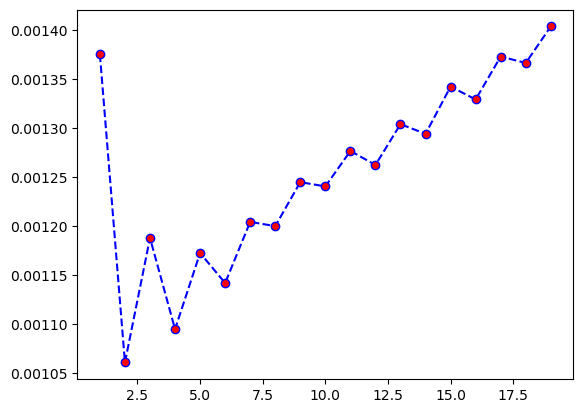

In [179]:
plt.plot(range(1,20), error_rate,color='blue', ls='--', marker='o', markerfacecolor='red' )

### Seems that the best value of k is 2 which is obtained through the elbow method.

In [302]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_final, y_train)

KNeighborsClassifier(n_neighbors=2)

In [303]:
predictions = knn.predict(x_test_final)

In [304]:
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.86194529048419
Recall_Score:  60.25449101796407
Precision_Score:  88.99944720840243
F1_Score:  71.85896005355946


* Although the Accuracy increased on using the optimal K value through the elbow method 

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train_final, y_train)

In [ ]:
predictions = svm_model.predict(x_test_final)

In [ ]:
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

## Artificial Neural Networks

In [106]:
D = x_train_final.shape[1]
D

6

In [107]:
i = Input(shape=(D,))
out = Dense(32,activation='relu')(i)
out = Dense(64, activation='relu')(out)
out = Dense(128, activation='relu')(out)
out = Dense(1, activation='sigmoid')(out)

model = Model(i,out)

In [108]:
model.compile(optimizer='Adam',
             loss ='binary_crossentropy',
             metrics=['Accuracy'])

In [111]:
r = model.fit(x_train_final, y_train, 
          validation_data=(x_test_final, y_test), 
          epochs=10)

Epoch 1/10
57953/57953 [==============================] - 225s 4ms/step - loss: 0.0123 - Accuracy: 0.9978 - val_loss: 73813.1250 - val_Accuracy: 0.9041
Epoch 2/10
57953/57953 [==============================] - 234s 4ms/step - loss: 0.0093 - Accuracy: 0.9982 - val_loss: 284872.6250 - val_Accuracy: 0.7872
Epoch 3/10
57953/57953 [==============================] - 238s 4ms/step - loss: 0.0080 - Accuracy: 0.9983 - val_loss: 7598061.5000 - val_Accuracy: 0.0080
Epoch 4/10
57953/57953 [==============================] - 231s 4ms/step - loss: 0.0071 - Accuracy: 0.9984 - val_loss: 3043917.2500 - val_Accuracy: 0.6372
Epoch 5/10
57953/57953 [==============================] - 237s 4ms/step - loss: 0.0064 - Accuracy: 0.9984 - val_loss: 6071597.5000 - val_Accuracy: 0.2323
Epoch 6/10
57953/57953 [==============================] - 244s 4ms/step - loss: 0.0062 - Accuracy: 0.9985 - val_loss: 3396036.7500 - val_Accuracy: 0.6803
Epoch 7/10
57953/57953 [==============================] - 244s 4ms/step - loss:

In [112]:
predictions = model.predict(x_test_final)

28544/28544 [==============================] - 62s 2ms/step


In [115]:
predictions = np.argmax(predictions, axis=1)

In [116]:
recall = recall_score(y_test, predictions, average='weighted')
print("Weighted Recall Score:", recall)

Weighted Recall Score: 0.9970746852987609


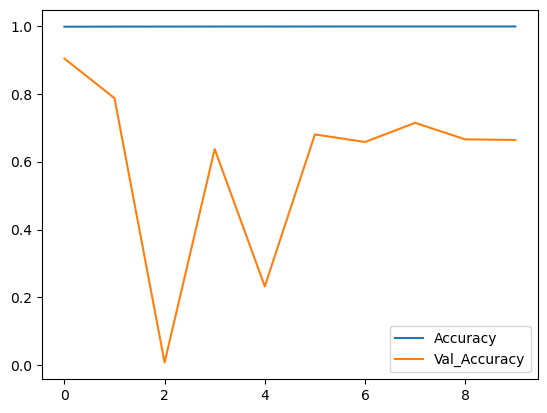

In [119]:
plt.plot(r.history['Accuracy'], label='Accuracy')
plt.plot(r.history['val_Accuracy'], label='Val_Accuracy')
plt.legend()

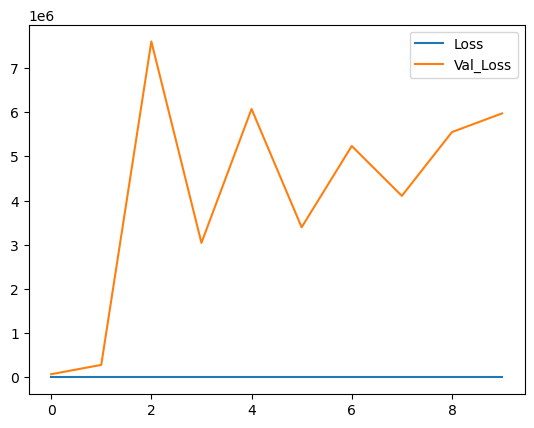

In [121]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()